In [17]:
from __future__ import print_function
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

SCALED_MEAN = 0.1307
SCALED_STD = 0.3081

In [18]:
def load_mnist_data(batch_size = 4, train = True, shuffle = True):
    # Create data transformation pipeline
    transform = transforms.Compose([
        transforms.ToTensor(), # Tranform image to tensor, already scales data between 0 and 1
        transforms.Normalize((SCALED_MEAN,), (SCALED_STD,)) # Normalize for range to by mean std of scaled data
    ])
    
    dataset = torchvision.datasets.MNIST(root='./data', train=train, download=True, transform=transform)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=2)
    return dataset, dataloader

# functions to show an image
def imshow(img):
    img = img * SCALED_STD + SCALED_MEAN # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# MNIST classification

## 1. Load data

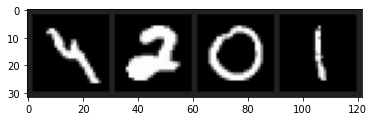

    4,    2,    0,    1


In [21]:
# MNIST labels
classes = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

# Load data
trainset, trainloader = load_mnist_data(batch_size = 4, train = True, shuffle = True)
testset, testloader = load_mnist_data(batch_size = 4, train = False, shuffle = False)

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# 4 elements since batch size = 4
print(','.join('%5s' % classes[labels[j]] for j in range(4)))

## 2. Create model